In [54]:
import psycopg2
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
with open('form5500_data/config.json') as f:
   conf = json.load(f)
   host = conf['host']
   database = conf['database']
   user = conf['user']
   passw = conf['passw']

In [10]:
conn_str = "host={} dbname={} user={} password={}".format(host, database, user, passw)

In [11]:
conn = psycopg2.connect(conn_str)

In [20]:
test_query="SELECT sb.SB_EIN, sb.SB_PN, sb.SB_CURR_VALUE_AST_01_AMT, sb.SB_TOT_FNDNG_TGT_AMT, sb.SB_PLAN_YEAR_BEGIN_DATE, form.SPONSOR_DFE_NAME, form.PLAN_NAME FROM sb_full sb LEFT JOIN f5500_full form ON sb.SB_EIN = form.SPONS_DFE_EIN AND sb.SB_PN = form.SPONS_DFE_PN WHERE sb.SB_PLAN_YEAR_BEGIN_DATE >= '2017-01-01';"

In [39]:
query = "SELECT sb.SB_EIN, sb.SB_PN, sb.SB_CURR_VALUE_AST_01_AMT, sb.SB_TOT_FNDNG_TGT_AMT, sb.SB_PLAN_YEAR_BEGIN_DATE, sb.SB_EFF_INT_RATE_PRCNT, \
form.SPONSOR_DFE_NAME, form.PLAN_NAME, form.SHORT_PLAN_YR_IND, form.COLLECTIVE_BARGAIN_IND, \
h.TOT_ASSETS_BOY_AMT, h.TOT_ASSETS_EOY_AMT, h.TOT_LIABILITIES_BOY_AMT, h.TOT_LIABILITIES_EOY_AMT, h.NET_ASSETS_BOY_AMT, h.NET_ASSETS_EOY_AMT \
FROM sb_full sb \
LEFT JOIN f5500_full form \
ON sb.SB_EIN = form.SPONS_DFE_EIN AND sb.SB_PN = form.SPONS_DFE_PN \
LEFT JOIN h_full h \
ON sb.SB_EIN = h.SCH_H_EIN AND sb.SB_PN = h.SCH_H_PN \
WHERE sb.SB_PLAN_YEAR_BEGIN_DATE BETWEEN '2017-01-01' AND '2017-12-31';"

In [40]:
query

"SELECT sb.SB_EIN, sb.SB_PN, sb.SB_CURR_VALUE_AST_01_AMT, sb.SB_TOT_FNDNG_TGT_AMT, sb.SB_PLAN_YEAR_BEGIN_DATE, sb.SB_EFF_INT_RATE_PRCNT, form.SPONSOR_DFE_NAME, form.PLAN_NAME, form.SHORT_PLAN_YR_IND, form.COLLECTIVE_BARGAIN_IND, h.TOT_ASSETS_BOY_AMT, h.TOT_ASSETS_EOY_AMT, h.TOT_LIABILITIES_BOY_AMT, h.TOT_LIABILITIES_EOY_AMT, h.NET_ASSETS_BOY_AMT, h.NET_ASSETS_EOY_AMT FROM sb_full sb LEFT JOIN f5500_full form ON sb.SB_EIN = form.SPONS_DFE_EIN AND sb.SB_PN = form.SPONS_DFE_PN LEFT JOIN h_full h ON sb.SB_EIN = h.SCH_H_EIN AND sb.SB_PN = h.SCH_H_PN WHERE sb.SB_PLAN_YEAR_BEGIN_DATE BETWEEN '2017-01-01' AND '2017-12-31';"

In [41]:
test_df = pd.read_sql(query, con=conn)

In [52]:
test_df.head()

,sb_ein,sb_pn,sb_curr_value_ast_01_amt,sb_tot_fndng_tgt_amt,sb_plan_year_begin_date,sb_eff_int_rate_prcnt,sponsor_dfe_name,plan_name,short_plan_yr_ind,collective_bargain_ind,tot_assets_boy_amt,tot_assets_eoy_amt,tot_liabilities_boy_amt,tot_liabilities_eoy_amt,net_assets_boy_amt,net_assets_eoy_amt,funded_status,fs_bucket
0,113668701,2,4319667.0,4526792.0,2017-01-01,5.45,"TRINITAS ANESTHESIA ASSOCIATES, LLC",TRINITAS ANESTHESIA ASSOCIATES CASH BALANCE PLAN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.954245,"(0.9, 1.0]"
1,680230260,2,1198974.0,1194711.0,2017-01-01,4.16,ROBERT S. BJEKICH,ROBERT S. BJEKICH DEFINED BENEFIT PENSION PLAN,1,None,NaN,NaN,NaN,NaN,NaN,NaN,1.003568,"(1.0, 2.0]"
2,471198485,2,687854.0,578615.0,2017-01-01,5.79,QUORUM TECHNOLOGY CORPORATION,QUORUM TECHNOLOGY CORPORATION CASH BALANCE PLAN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.188794,"(1.0, 2.0]"
3,135120739,3,6213060.0,6864191.0,2017-01-01,5.77,THE GREEN-WOOD CEMETERY,RETIREMENT PLAN FOR SALARIED EMPLOYEES OF THE ...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.905141,"(0.9, 1.0]"
4,221435504,2,10293648.0,9646868.0,2017-01-01,5.84,UNITED FOOD AND COMMERCIAL WORKERS INTERNATION...,"RETIREMENT PLAN FOR OFFICERS,BUSINESS REPS AND...",None,None,10006114.0,9825792.0,NaN,NaN,10006114.0,9825792.0,1.067046,"(1.0, 2.0]"


In [63]:
test_df[test_df['fs_bucket'].isnull()]

,sb_ein,sb_pn,sb_curr_value_ast_01_amt,sb_tot_fndng_tgt_amt,sb_plan_year_begin_date,sb_eff_int_rate_prcnt,sponsor_dfe_name,plan_name,short_plan_yr_ind,collective_bargain_ind,tot_assets_boy_amt,tot_assets_eoy_amt,tot_liabilities_boy_amt,tot_liabilities_eoy_amt,net_assets_boy_amt,net_assets_eoy_amt,funded_status,fs_bucket
230,943002817,3,0.0,0.0,2017-01-01,5.05,"THE IDELL FIRM, A PROFESSIONAL CORPORATION","THE IDELL FIRM, A PROFESSIONAL CORPORATION DEF...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,611548253,2,0.0,0.0,2017-01-01,5.73,SHORE ENDODONTIC GROUP LLC,SHORE ENDODONTIC GROUP LLC CASH BALANCE PLAN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,223340308,3,0.0,0.0,2017-01-01,5.79,"PRO-STAT, INC.","PRO-STAT, INC. CASH BALANCE PLAN",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,330325871,2,0.0,120238.0,2017-01-01,5.01,"JAYE-JO PORTANOVA, M.D., INC.","JAYE-JO PORTANOVA, M.D., INC. DEFINED BENEFIT ...",0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
358,300404864,2,0.0,0.0,2017-01-01,5.75,"CHILDREN'S HEALTH CENTER, LLC","CHILDREN'S HEALTH CENTER, LLC CASH BALANCE PLAN",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,461427486,1,NaN,0.0,2017-07-01,NaN,LIFE ORCHESTRATIONS INC,LIFE ORCHESTRATIONS INC 401K PLAN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,943323649,1,0.0,208391.0,2017-01-01,5.87,ALEX BARCHUK MD,ALEX BARCHUK MD DEFINED BENEFIT PENSION PLAN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
530,264110853,2,0.0,0.0,2017-01-01,6.18,COLE-FRIEMAN & MALLON LLP,COLE-FRIEMAN & MALLON LLP CASH BALANCE PLAN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,450587962,1,NaN,0.0,2017-01-01,NaN,"STAY TAN NORTH, INC.","STAY TAN NORTH, INC. PROFIT SHARING 401(K) PLAN",0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,130899120,3,0.0,0.0,2017-01-01,5.96,KANE INTERNATIONAL CORPORATION,KANE INTERNATIONAL CORPORATION CASH BALANCE PE...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
test_df['funded_status']=test_df['sb_curr_value_ast_01_amt']/test_df['sb_tot_fndng_tgt_amt']

In [59]:
fs_buckets = np.array([0,.7,.8,.9,1.,2.,3.,10.])

In [60]:
test_df['fs_bucket']=pd.cut(test_df['funded_status'], fs_buckets)

TypeError: unorderable types: Interval() < float()

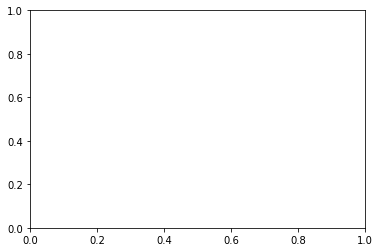

In [56]:
plt.hist(test_df['fs_bucket'])